In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as stats

%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import parallel_coordinates

In [30]:
spine_df.rename(columns = {
    'GroupingInclusions (1 include, 2 exclude)':'Grouping',
    'Genetics (1 yes, 2=NO)':'Genetics',
    'WhatSurgery (1=Nuss, 2= Spine, 3=other)':'WhatSurgery',
    'Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Top level',
    'Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Bottom level',
    'Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)':'Shape',
}, inplace=True)
chest_df.rename(columns = {
    'GroupingInclusions (1 include, 2 exclude)':'Grouping',
    'Genetics (1 yes, 2=NO)':'Genetics',
    'WhatSurgery (1=Nuss, 2= Spine, 3=other)':'WhatSurgery',
    'Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Top level',
    'Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Bottom level',
    'Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)':'Shape',
}, inplace=True)

/Users/eileenzyf/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [31]:
spine_df.head()

,Grouping,Genetics,PatientGender,PatientAge,PatientWeight,PatientRace,WhatSurgery,Haller Index (999= not applicable),Risser,Top level,Bottom level,# of levels,Shape,Top degree,Bottom degree,SurgeryHX,Surgeries,DischargeDate,DODPostOpDay,PostOpHrs,PhoneFollowUpDate,PFUPostOpDay,ASA,Surgeon,PACUManagement = (0=picu; PACU morphine equivalents=PACU; PACU nothing - 0.01; Benadryl9+dose),"ComplementaryTherapies (0=none, 1=guided imagery, 2=massage, 3=guided imagry and massage)",ParentAge,ParentGender,ParentRace,Relationship,PatientPredictive,ParentPredictive,Hrs0_12MeanPainScore,Hrs13_24MeanPainScore,Hrs25_36MeanPainScore,Hrs37_48MeanPainScore,Hrs49_60MeanPainScore,Hrs61_72MeanPainScore,Hrs73_84MeanPainScore,Hrs85_96MeanPainScore,Hrs97_108MeanPainScore,Hrs109_120MeanPainScore,Hrs121_132MeanPainScore,Hrs133_144MeanPainScores,Hrs145_156MeanPainScores,Hrs157_168MeanPainScores,Hrs169_180MeanPainScores,Hrs181_192MeanPainScores,Mean,POD1APPTVAS,POD2APPTVAS,POD3APPTVAS,POD4APPTVAS,POD5APPTVAS,POD6APPTVAS,POD7APPTVAS,POD8APPTVAS,PDHomeAPPTVAS,PDClinic1APPTVAS,PDClinic2APPTVAS,PDClinic3APPTVAS,PDClinic4APPTVAS,PDClinic5APPTVAS,MeanVAS,PainDiff,Hrs0_12MeanPainScoreVASstd,Hrs0_12MeanPainScoreNstd,Hrs13_24MeanPainScoreVASstd,Hrs13_24MeanPainScoreNstd,Hrs25_36MeanPainScoreVASstd,Hrs25_36MeanPainScoreNstd,Hrs37_48MeanPainScoreVASstd,Hrs37_48MeanPainScoreNstd,Hrs49_60MeanPainScoreVASstd,Hrs49_60MeanPainScoreNstd,Hrs61_72MeanPainScoreVASstd,Hrs61_72MeanPainScoreNstd,Hrs73_84MeanPainScoreVASstd,Hrs73_84MeanPainScoreNstd,Hrs85_96MeanPainScoreVASstd,Hrs85_96MeanPainScoreNstd,Hrs97_108MeanPainScoreVASstd,Hrs97_108MeanPainScoreNstd,Hrs109_120MeanPainScoreVASstd,Hrs109_120MeanPainScoreNstd,Hrs121_132MeanPainScoreVASstd,Hrs121_132MeanPainScoreNstd,Hrs133_144MeanPainScoresVASstd,Hrs133_144MeanPainScoresNstd,Hrs145_156MeanPainScoresVASstd,Hrs145_156MeanPainScoresNstd,Hrs157_168MeanPainScoresVASstd,Hrs157_168MeanPainScoresNstd,Hrs169_180MeanPainScoresVASstd,Hrs169_180MeanPainScoresNstd,Hrs181_192MeanPainScoresVASstd,Hrs181_192MeanPainScoresNstd
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
504,1,1,2,137,63.0,1,2,999.0,777.0,11,22.0,11,1.0,51.0,42.0,0,999,2014-03-27 00:00:00,6.0,137.0,2014-03-21 00:00:00,11.0,2,1,777.00,0,460,2,1,1,70.0,100,5.50,4.00,4.67,4.67,5.40,5.13,5.50,4.00,5.0,6.2,6.0,6.0,NaN,NaN,NaN,NaN,5.17250,36.08,NaN,52.58,NaN,NaN,NaN,NaN,NaN,NaN,7.22,NaN,NaN,NaN,NaN,3.196000,1.976500,3.523500,0.32750,2.023500,-1.17250,2.693500,-0.50250,2.693500,-0.50250,3.423500,0.22750,3.153500,-0.04250,3.523500,0.32750,2.023500,-1.17250,3.023500,-0.1725,4.223500,1.0275,4.0235,0.8275,4.0235,0.8275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,1,1,1,234,57.7,1,2,999.0,5.0,10,21.0,11,3.0,89.0,999.0,0,999,2014-05-23 00:00:00,4.0,93.0,2014-05-30 00:00:00,11.0,2,2,0.01,0,504,2,1,1,70.0,100,2.50,3.67,4.00,3.00,3.67,3.33,4.00,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.55250,51.55,49.48,41.24,38.14,NaN,NaN,NaN,NaN,22.68,NaN,22.68,NaN,8.0,NaN,3.339571,0.212929,2.287071,-1.05250,3.457071,0.11750,3.787071,0.44750,2.787071,-0.55250,3.457071,0.11750,3.117071,-0.22250,3.787071,0.44750,4.037071,0.69750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1,1,2,158,40.0,1,2,999.0,777.0,11,21.0,10,777.0,40.0,23.0,0,999,2014-06-28 00:00:00,4.0,100.0,2014-07-03 00:00:00,9.0,2,1,0.01,0,542,2,1,1,80.0,90,4.83,4.83,6.00,5.00,5.00,5.00,3.33,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.87375,43.30,67.01,51.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.395333,-0.521583,5.351583,-0.04375,5.351583,-0.04375,6.521583,1.12625,5.521583,0.12625,5.521583,0.12625,5.521583,0.12625,3.851583,-1.54375,5.521583,0.12625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,1,1,2,177,58.0,1,2,999.0,4.0,11,22.0,11,1.0,67.0,59.0,0,999,2014-07-08 00:00:00,5.0,110.0,2014-07-15 00:00:00,12.0,1,1,0.01,0,560,2,1,1,60.0,70,5.00,4.33,3.50,4.33,4.50,5.50,6.00,4.00,4.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4.71600,68.04,64.95,64.95,64.95,NaN,NaN,NaN,N

In [32]:
chest_df.head()

,Grouping,Genetics,PatientGender,PatientAge,PatientWeight,PatientRace,WhatSurgery,Haller Index (999= not applicable),Risser,Top level,Bottom level,# of levels,Shape,Top degree,Bottom degree,SurgeryHX,Surgeries,DischargeDate,DODPostOpDay,PostOpHrs,PhoneFollowUpDate,PFUPostOpDay,ASA,Surgeon,PACUManagement = (0=picu; PACU morphine equivalents=PACU; PACU nothing - 0.01; Benadryl9+dose),"ComplementaryTherapies (0=none, 1=guided imagery, 2=massage, 3=guided imagry and massage)",ParentAge,ParentGender,ParentRace,Relationship,PatientPredictive,ParentPredictive,Hrs0_12MeanPainScore,Hrs13_24MeanPainScore,Hrs25_36MeanPainScore,Hrs37_48MeanPainScore,Hrs49_60MeanPainScore,Hrs61_72MeanPainScore,Hrs73_84MeanPainScore,Hrs85_96MeanPainScore,Hrs97_108MeanPainScore,Hrs109_120MeanPainScore,Hrs121_132MeanPainScore,Hrs133_144MeanPainScores,Hrs145_156MeanPainScores,Hrs157_168MeanPainScores,Hrs169_180MeanPainScores,Hrs181_192MeanPainScores,Mean,POD1APPTVAS,POD2APPTVAS,POD3APPTVAS,POD4APPTVAS,POD5APPTVAS,POD6APPTVAS,POD7APPTVAS,POD8APPTVAS,PDHomeAPPTVAS,PDClinic1APPTVAS,PDClinic2APPTVAS,PDClinic3APPTVAS,PDClinic4APPTVAS,PDClinic5APPTVAS,MeanVAS,PainDiff,Hrs0_12MeanPainScoreVASstd,Hrs0_12MeanPainScoreNstd,Hrs13_24MeanPainScoreVASstd,Hrs13_24MeanPainScoreNstd,Hrs25_36MeanPainScoreVASstd,Hrs25_36MeanPainScoreNstd,Hrs37_48MeanPainScoreVASstd,Hrs37_48MeanPainScoreNstd,Hrs49_60MeanPainScoreVASstd,Hrs49_60MeanPainScoreNstd,Hrs61_72MeanPainScoreVASstd,Hrs61_72MeanPainScoreNstd,Hrs73_84MeanPainScoreVASstd,Hrs73_84MeanPainScoreNstd,Hrs85_96MeanPainScoreVASstd,Hrs85_96MeanPainScoreNstd,Hrs97_108MeanPainScoreVASstd,Hrs97_108MeanPainScoreNstd,Hrs109_120MeanPainScoreVASstd,Hrs109_120MeanPainScoreNstd,Hrs121_132MeanPainScoreVASstd,Hrs121_132MeanPainScoreNstd,Hrs133_144MeanPainScoresVASstd,Hrs133_144MeanPainScoresNstd,Hrs145_156MeanPainScoresVASstd,Hrs145_156MeanPainScoresNstd,Hrs157_168MeanPainScoresVASstd,Hrs157_168MeanPainScoresNstd,Hrs169_180MeanPainScoresVASstd,Hrs169_180MeanPainScoresNstd,Hrs181_192MeanPainScoresVASstd,Hrs181_192MeanPainScoresNstd
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
501,1,1,1,194,65.0,1,1,3.90,999.0,999,999.0,999,999.0,999.0,999.0,0,999,2013-12-24 00:00:00,8.0,189.00,2013-12-30 00:00:00,14.0,1,6,777.000,0,777,1,1,2,90.0,90,7.67,7.83,7.21,7.20,7.50,6.33,5.71,7.25,7.50,5.83,5.5,6.0,7.0,6.5,4.5,7.0,6.658125,73.20,65.98,NaN,NaN,NaN,NaN,68.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.907333,-0.249208,7.919208,1.011875,8.079208,1.171875,7.459208,0.551875,7.449208,0.541875,7.749208,0.841875,6.579208,-0.328125,5.959208,-0.948125,7.499208,0.591875,7.749208,0.841875,6.079208,-0.828125,5.749208,-1.158125,6.249208,-0.658125,7.249208,0.341875,6.749208,-0.158125,4.749208,-2.158125,7.249208,0.341875
502,1,1,1,179,57.0,1,1,3.86,999.0,999,999.0,999,999.0,999.0,99.0,0,999,2013-12-22 00:00:00,4.0,93.50,2013-12-22 00:00:00,12.0,2,3,777.000,1,777,2,1,1,777.0,777,4.00,4.33,3.67,3.50,4.00,3.67,1.50,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.458750,45.36,29.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.43,NaN,NaN,2.989667,0.469083,3.530917,0.541250,3.860917,0.871250,3.200917,0.211250,3.030917,0.041250,3.530917,0.541250,3.200917,0.211250,1.030917,-1.958750,2.530917,-0.458750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,1,1,1,185,68.0,1,1,3.90,999.0,999,999.0,999,999.0,999.0,999.0,1,Reconstructive Surgeries on middle finger of l...,2014-03-28 00:00:00,4.0,96.00,2014-03-31 00:00:00,7.0,1,4,9.338,1,679,1,1,2,80.0,80,5.50,1.00,3.75,5.25,4.33,3.33,5.42,4.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.113750,36.08,38.14,37.11,72.16,NaN,NaN,NaN,NaN,NaN,35.05,22.68,NaN,NaN,NaN,4.020333,0.093417,5.406583,1.386250,0.906583,-3.113750,3.656583,-0.363750,5.156583,1.136250,4.236583,0.216250,3.236583,-0.783750,5.326583,1.306250,4.236583,0.216250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,1,1,1,180,66.0,1,1,3.10,999.0,999,999.0,999,999.0,999.0,999.0,0,999,2014-05-12 00:00:00,5.0,113.75,2014-05-16 

In [33]:
from sklearn.cluster import KMeans

In [34]:
# Pain scores not part of clustering by patient characteristics for chest patients.
chest_df_features = chest_df[chest_df.columns[:-81]]
#drop spine related variables
chest_df_features = chest_df_features.drop(["Risser", "Top level", "Bottom level", "# of levels", "Shape", "Top degree ","Bottom degree"], axis = 1)

#what type of surgery not applicable so dropped.
chest_df_features = chest_df_features.drop('WhatSurgery', axis=1)

In [35]:

#spine_df_features['Haller_categories'] = pd.cut(spine_df_features['Haller Index (999= not applicable)'],[-1,7,19,24,999],labels=[1,2,3,4])


In [36]:
model3 = KMeans(n_clusters=3)
model3.fit(chest_df_features)
labels3 = model3.predict(chest_df_features)
cents3 = model3.cluster_centers_

In [37]:
cents3

array([[  1.        ,   1.        ,   1.        , 181.91666667,
         60.98333333,   1.66666667,   4.22166667,   0.25      ],
       [  1.        ,   1.        ,   1.        , 218.5       ,
         65.05      ,   2.25      ,   4.695     ,   0.5       ],
       [  1.        ,   1.125     ,   1.375     , 164.625     ,
         51.425     ,   2.        ,   4.15      ,   0.375     ]])

In [60]:
labels3


array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0,
       2, 1], dtype=int32)

In [38]:
model5 = KMeans(n_clusters=5)
model5.fit(chest_df_features)
labels5 = model5.predict(chest_df_features)
cents5 = model5.cluster_centers_

In [39]:
cents5

array([[  1.        ,   1.        ,   1.        , 231.        ,
         66.6       ,   1.        ,   4.64      ,   1.        ],
       [  1.        ,   1.        ,   1.        , 180.33333333,
         58.82222222,   1.88888889,   4.40666667,   0.33333333],
       [  1.        ,   1.        ,   1.        , 200.25      ,
         64.4       ,   2.25      ,   4.4       ,   0.        ],
       [  1.        ,   1.        ,   1.        , 163.5       ,
         73.65      ,   1.        ,   3.7       ,   0.        ],
       [  1.        ,   1.14285714,   1.42857143, 165.85714286,
         47.98571429,   2.14285714,   4.1       ,   0.42857143]])

In [40]:
chest_df_labels = chest_df_features.copy()
chest_df_labels['kmeans3_label'] = labels3
chest_df_labels['kmeans5_label'] = labels5

Text(0.5,1,'Correlations across features for chest surgery patients')

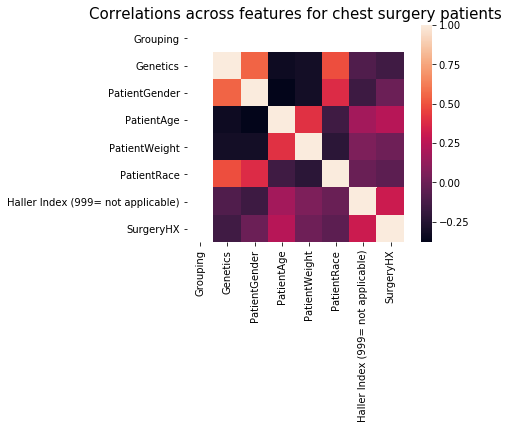

In [56]:
ax = plt.axes()
sb.heatmap(chest_df_features.corr(), square=True)
ax.set_title('Correlations across features for chest surgery patients', size=15)

In [42]:
chest_df_labels

,Grouping,Genetics,PatientGender,PatientAge,PatientWeight,PatientRace,Haller Index (999= not applicable),SurgeryHX,kmeans3_label,kmeans5_label
PatientID,,,,,,,,,,
501,1,1,1,194,65.0,1,3.90,0,0,2
502,1,1,1,179,57.0,1,3.86,0,0,1
503,1,1,1,185,68.0,1,3.90,1,0,1
505,1,1,1,180,66.0,1,3.10,0,0,1
507,1,1,1,167,55.0,1,5.90,1,2,4
518,1,1,1,170,38.0,1,3.20,1,2,4
521,1,1,1,178,53.0,1,5.50,0,0,1
522,1,1,1,225,71.5,1,3.98,1,1,0
524,1,1,1,237,61.7,1,5.30,1,1,0


Cluster 0 Grouping: Included Genetics: Yes Gender: mostly Male Age: 181.917 Weight: 60.983 Race: mostly White Haller Index: 4.222 Surgery HX: 0.25 (more likely not to have had surgery)

Cluster 1 Grouping: Included Genetics: Yes Gender: Male Age: 218.5 Weight: 65.05 Race: White with one mixed Haller Index: 3.62 Surgery HX: 0.5 (equal probability)

Cluster 2 Grouping: Included Genetics: Yes Gender: Male and Female, leaning Male Age: 164.625 Weight: 51.425 Race: Mostly White Haller Index: 4.15 Surgery HX: 0.375 (likely not to have had surgery)


Text(0.5,1,'K Means with k=3')

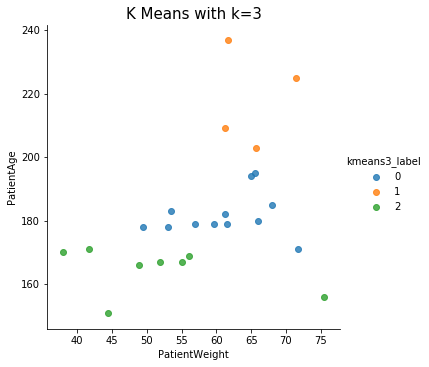

In [61]:
facet = sb.lmplot(data=chest_df_labels, x='PatientWeight', y='PatientAge', hue='kmeans3_label', 
                   fit_reg=False, legend=True, legend_out=True)
axes = facet.axes.flatten()
axes[0].set_title('K Means with k=3', size = 15)

Text(0.5,1,'K Means with k=5')

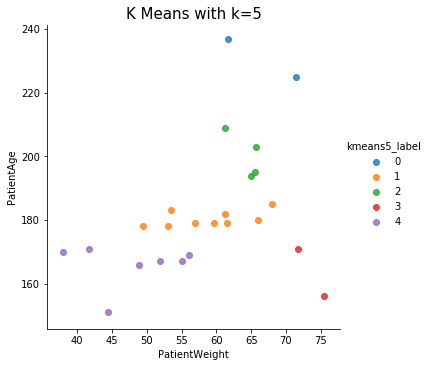

In [62]:
facet = sb.lmplot(data=chest_df_labels, x='PatientWeight', y='PatientAge', hue='kmeans5_label', 
                   fit_reg=False, legend=True, legend_out=True)
axes = facet.axes.flatten()
axes[0].set_title('K Means with k=5', size = 15)

Text(0.5,1,'Correlations across features for 3 clusters')

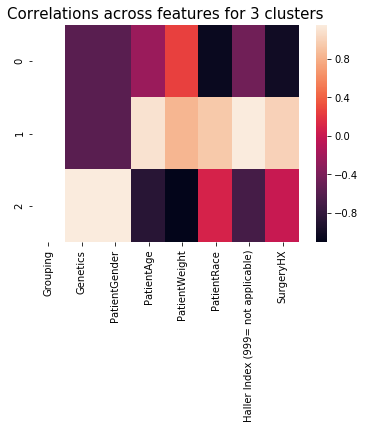

In [63]:
kmeans3_df = pd.DataFrame(cents3, columns = chest_df_features.columns)
kmeans3_df_norm = (kmeans3_df - kmeans3_df.mean())/kmeans3_df.std()
ax = plt.axes()
sb.heatmap(kmeans3_df_norm)
ax.set_title('Correlations across features for 3 clusters', size=15)

Text(0.5,1,'Correlations across features for 5 clusters')

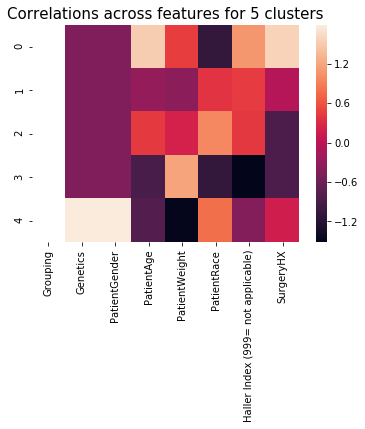

In [64]:
kmeans5_df = pd.DataFrame(cents5, columns = chest_df_features.columns)
kmeans5_df_norm = (kmeans5_df - kmeans5_df.mean())/kmeans5_df.std()
ax = plt.axes()
sb.heatmap(kmeans5_df_norm)
ax.set_title('Correlations across features for 5 clusters', size=15)

# PCA Plotting

In [47]:
# normalizing the feature set
chest_df_features_norm = (chest_df_features - chest_df_features.mean())/chest_df_features.std()
chest_df_features_norm = chest_df_features_norm.drop("Grouping", axis = 1)

In [48]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [49]:
pca = sklearnPCA(n_components=2)
transformed_chest = pd.DataFrame(pca.fit_transform(chest_df_features_norm))

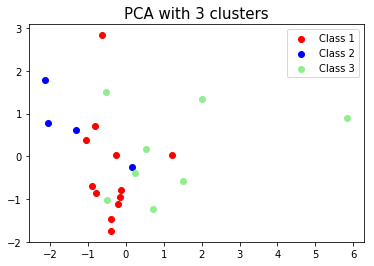

In [65]:
plt.scatter(transformed_chest[labels3==0][0], transformed_chest[labels3==0][1], label='Class 1', c='red')
plt.scatter(transformed_chest[labels3==1][0], transformed_chest[labels3==1][1], label='Class 2', c='blue')
plt.scatter(transformed_chest[labels3==2][0], transformed_chest[labels3==2][1], label='Class 3', c='lightgreen')
plt.title('PCA with 3 clusters', size = 15)
plt.legend()
plt.show()

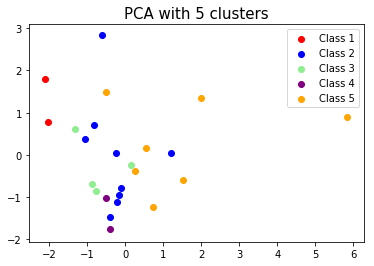

In [66]:
plt.scatter(transformed_chest[labels5==0][0], transformed_chest[labels5==0][1], label='Class 1', c='red')
plt.scatter(transformed_chest[labels5==1][0], transformed_chest[labels5==1][1], label='Class 2', c='blue')
plt.scatter(transformed_chest[labels5==2][0], transformed_chest[labels5==2][1], label='Class 3', c='lightgreen')
plt.scatter(transformed_chest[labels5==3][0], transformed_chest[labels5==3][1], label='Class 4', c='purple')
plt.scatter(transformed_chest[labels5==4][0], transformed_chest[labels5==4][1], label='Class 5', c='orange')
plt.title('PCA with 5 clusters', size = 15)
plt.legend()
plt.show()

# Parallel coordinates trendlines

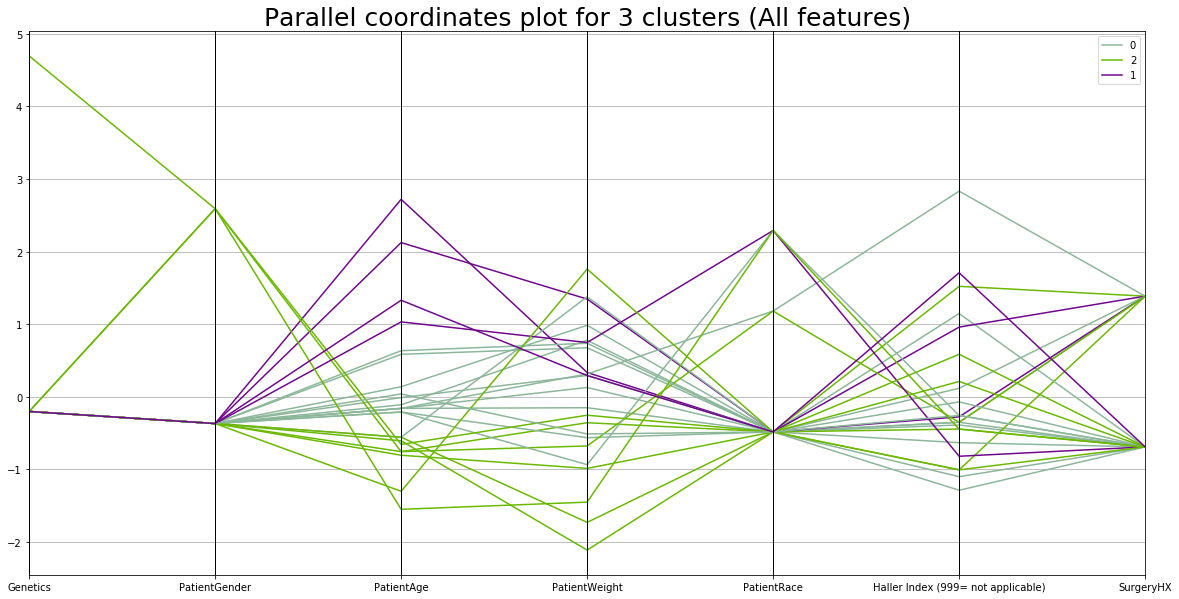

In [67]:
# Trendline changes across clusters for all variables.
plt.figure(figsize=(20,10))
plot_feats_all = list(chest_df_features_norm.columns)
data_norm_all = chest_df_features_norm.copy()[plot_feats_all]
data_norm_all['kmeans3_label'] = labels3

parallel_coordinates(data_norm_all, 'kmeans3_label')
plt.title("Parallel coordinates plot for 3 clusters (All features)", size = 25)
plt.show()

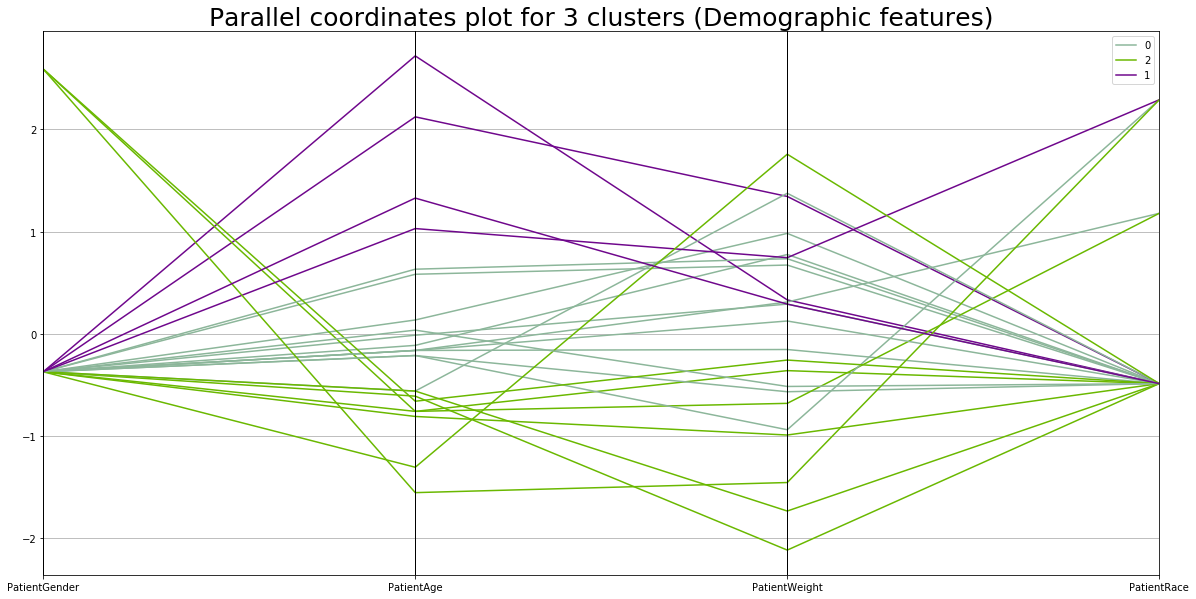

In [68]:
# Trendline changes across clusters for demographic variables.
plt.figure(figsize=(20,10))
plot_feats1 = ['PatientGender', 'PatientAge', 'PatientWeight', 'PatientRace']
data_norm_dem = chest_df_features_norm.copy()[plot_feats1]
data_norm_dem['kmeans3_label'] = labels3

parallel_coordinates(data_norm_dem, 'kmeans3_label')
plt.title("Parallel coordinates plot for 3 clusters (Demographic features)", size = 25)
plt.show()

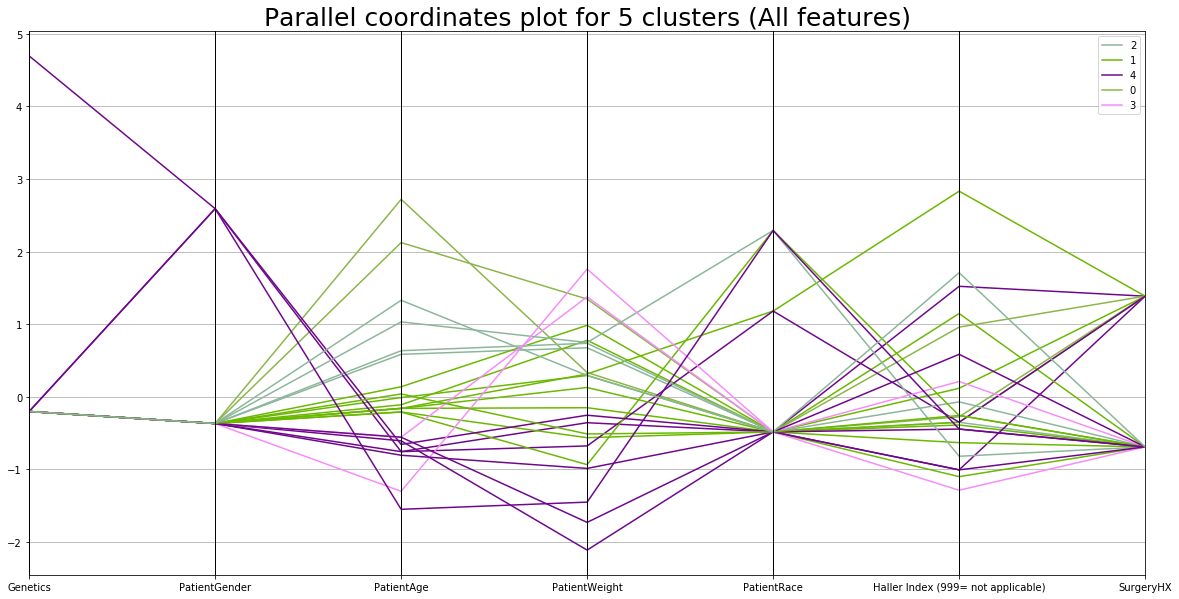

In [69]:
# FOR FIVE CLUSTERS
# Trendline changes across clusters for all variables.
plt.figure(figsize=(20,10))
plot_feats_all = list(chest_df_features_norm.columns)
data_norm_all = chest_df_features_norm.copy()[plot_feats_all]
data_norm_all['kmeans5_label'] = labels5
plt.title("Parallel coordinates plot for 5 clusters (All features)", size = 25)
parallel_coordinates(data_norm_all, 'kmeans5_label')
plt.show()


# Separating original dataframe by patient ID's using 3 clusters¶

In [70]:
chest_df['kmeans3'] = labels3
cluster1 = chest_df[chest_df['kmeans3'] == 0]
cluster2 = chest_df[chest_df['kmeans3'] == 1]
cluster3 = chest_df[chest_df['kmeans3'] == 2]

/Users/eileenzyf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
cluster1.shape

(12, 98)

In [72]:
cluster2.shape

(4, 98)

In [73]:
cluster3.shape

(8, 98)

In [74]:
standardized_cols = ['Hrs0_12MeanPainScoreNstd',
       'Hrs13_24MeanPainScoreNstd',
       'Hrs25_36MeanPainScoreNstd',
       'Hrs37_48MeanPainScoreNstd',
       'Hrs49_60MeanPainScoreNstd',
       'Hrs61_72MeanPainScoreNstd',
       'Hrs73_84MeanPainScoreNstd',
       'Hrs85_96MeanPainScoreNstd',
       'Hrs97_108MeanPainScoreNstd',
       'Hrs109_120MeanPainScoreNstd',
       'Hrs121_132MeanPainScoreNstd',
       'Hrs133_144MeanPainScoresNstd',
       'Hrs145_156MeanPainScoresNstd',
       'Hrs157_168MeanPainScoresNstd',
       'Hrs169_180MeanPainScoresNstd',
       'Hrs181_192MeanPainScoresNstd']

# Cluster 1 pain plot

Text(0.5,0,'Time interval')

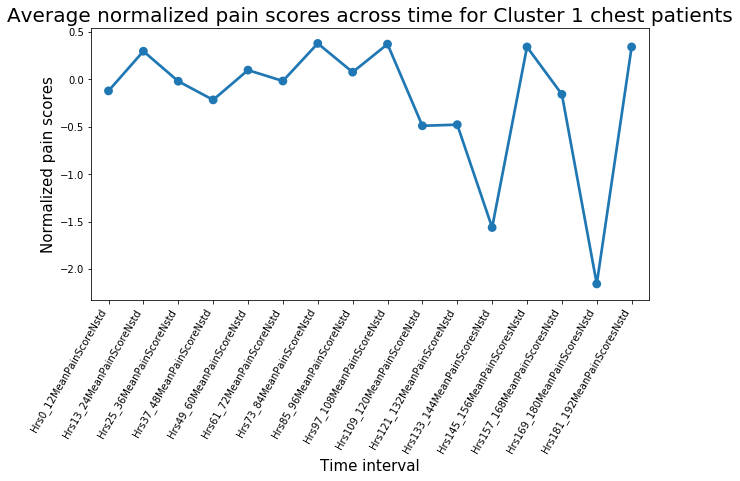

In [76]:
cluster1 = cluster1[standardized_cols]
plt.figure(figsize = (10,5))
sb.pointplot(list(cluster1.columns), [cluster1[rng].sum()/cluster1[rng].count() for rng in list(cluster1.columns)], order = list(cluster1.columns))
plt.xticks(rotation = 60, ha='right')

plt.title("Average normalized pain scores across time for Cluster 1 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

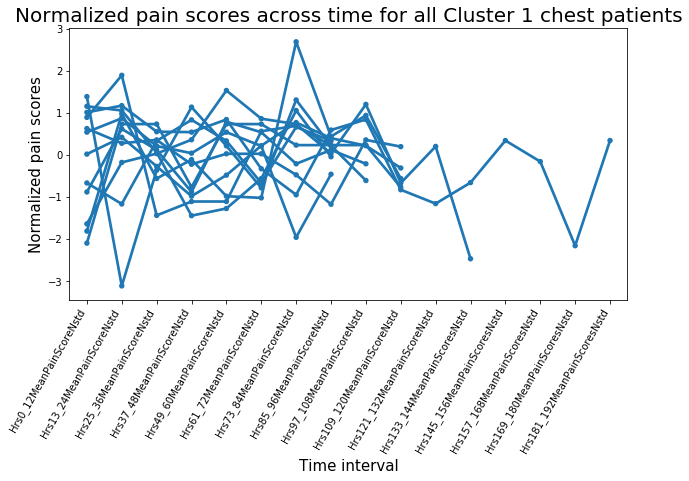

In [77]:
plt.figure(figsize = (10,5))
for i, (name, row) in enumerate(cluster1.iterrows()):
    sb.pointplot(list(cluster1.columns), row, order = list(cluster1.columns), markers = '.')
    plt.xticks(rotation = 60, ha='right')

plt.title("Normalized pain scores across time for all Cluster 1 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

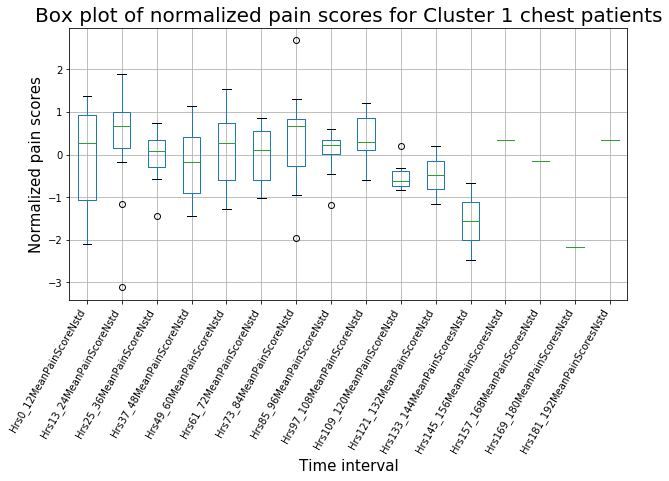

In [78]:
plt.figure(figsize = (10,5))
cluster1.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.title("Box plot of normalized pain scores for Cluster 1 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

# Cluster 2 pain plot

/Users/eileenzyf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time interval')

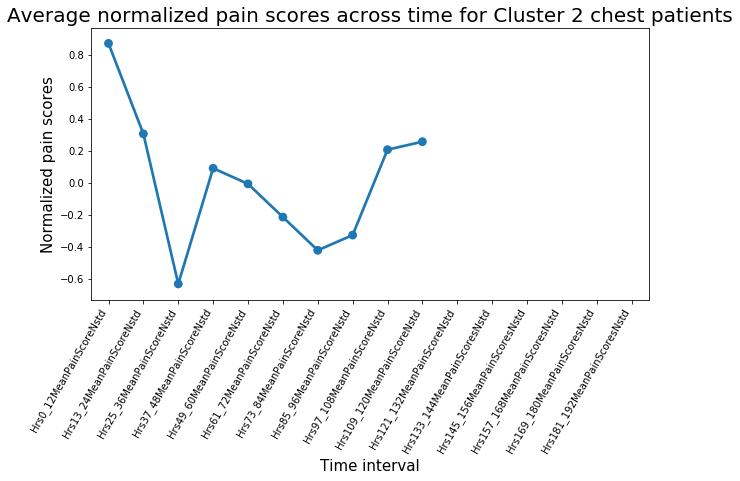

In [80]:
cluster2 = cluster2[standardized_cols]
plt.figure(figsize = (10,5))
sb.pointplot(list(cluster2.columns), [cluster2[rng].sum()/cluster2[rng].count() for rng in list(cluster2.columns)], order = list(cluster2.columns))
plt.xticks(rotation = 60, ha='right')
plt.title("Average normalized pain scores across time for Cluster 2 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

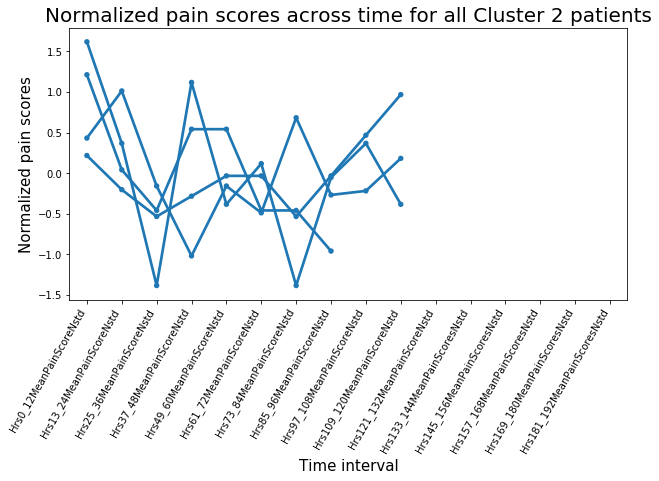

In [81]:
plt.figure(figsize = (10,5))
for i, (name, row) in enumerate(cluster2.iterrows()):
    sb.pointplot(list(cluster1.columns), row, order = list(cluster1.columns), markers = '.')
    plt.xticks(rotation = 60, ha='right')
    plt.title("Normalized pain scores across time for all Cluster 2 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

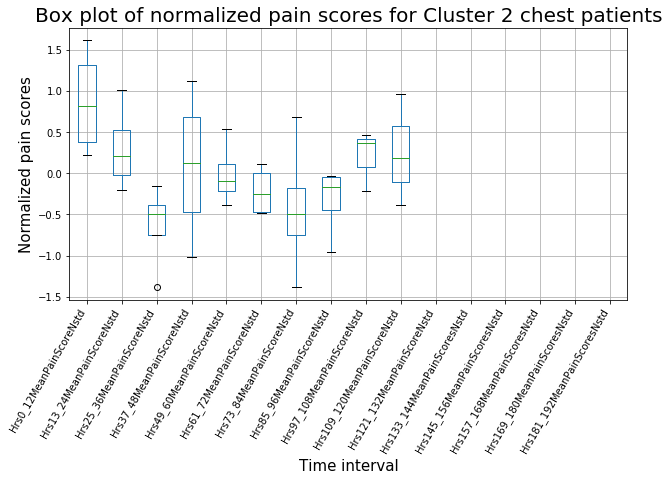

In [82]:
plt.figure(figsize = (10,5))
cluster2.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.title("Box plot of normalized pain scores for Cluster 2 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

# Cluster 3 pain plot

/Users/eileenzyf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time interval')

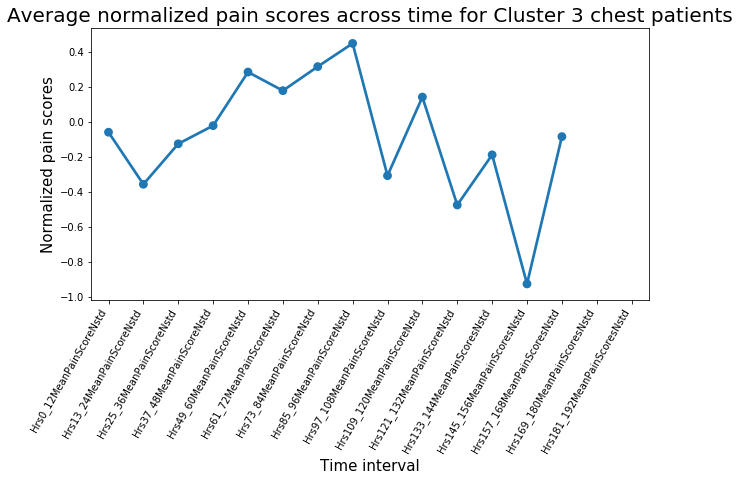

In [85]:
cluster3 = cluster3[standardized_cols]
plt.figure(figsize = (10,5))
sb.pointplot(list(cluster3.columns), [cluster3[rng].sum()/cluster3[rng].count() for rng in list(cluster3.columns)], order = list(cluster3.columns))
plt.xticks(rotation = 60, ha='right')
plt.title("Average normalized pain scores across time for Cluster 3 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

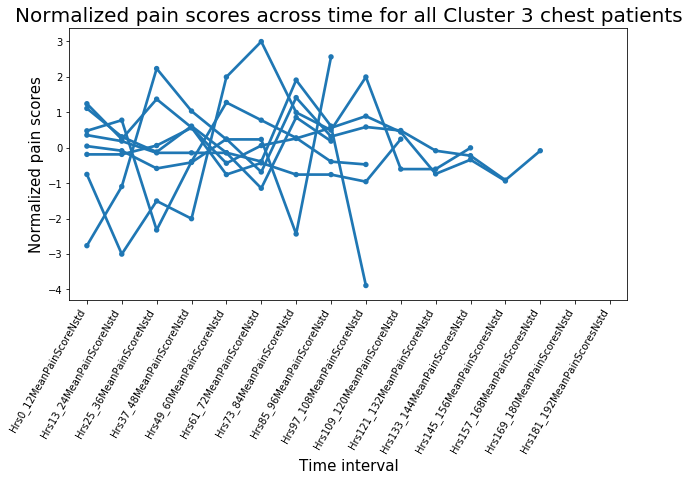

In [84]:
plt.figure(figsize = (10,5))
for i, (name, row) in enumerate(cluster3.iterrows()):
    sb.pointplot(list(cluster1.columns), row, order = list(cluster1.columns), markers = '.')
    plt.xticks(rotation = 60, ha='right')
plt.title("Normalized pain scores across time for all Cluster 3 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

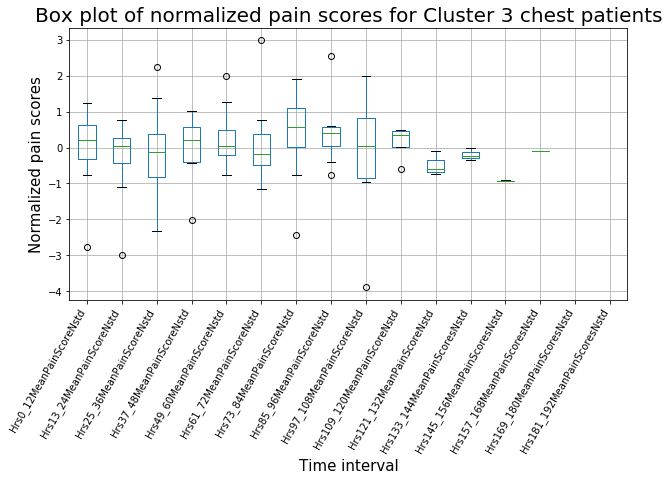

In [86]:
plt.figure(figsize = (10,5))
cluster3.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.title("Box plot of normalized pain scores for Cluster 3 chest patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

cluster 1: Pain level remained at the same level across time with some fluctuation in between
cluster 2: Pain level decreased in general with a rebound at the end 
cluster 3: Pain level decreased from 0hr to 108 hr and then flucatuted heavily 